<a href="https://colab.research.google.com/github/bioai96/Pytorch/blob/main/Pytorch_CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터 준비하기

In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 1.2 MB/s 


In [ ]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
!ls
!unzip bbbp.zip

--2022-09-23 00:03:33--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.192
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46174 (45K) [application/zip]
Saving to: ‘bbbp.zip’

bbbp.zip            100%[===================>]  45.09K  --.-KB/s    in 0.05s   

2022-09-23 00:03:33 (923 KB/s) - ‘bbbp.zip’ saved [46174/46174]

bbbp.zip  sample_data
Archive:  bbbp.zip
  inflating: BBBP.csv                
  inflating: BBBP_README             


In [ ]:
import pandas as pd

data = pd.read_csv('BBBP.csv')
data

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
#데이터를 확인해보니 Molobject로 변환되지 않는 데이터가 있었음
idxs = []
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if (mol == None):
      #print(i,mol)
      idxs.append(i)
data=data.drop(idxs, axis= 0)

In [ ]:
fps = [] 
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    arr = np.zeros((1,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, 4096)
    DataStructs.ConvertToNumpyArray(fp,arr)

    fps.append(arr)

data["fp"] = fps
data

,num,name,p_np,smiles,fp
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
X = np.stack(data.fp.values)
X = X.reshape(len(X),1,64,-1)
X.shape, type(X)
data["fps"]=X.tolist()

In [ ]:
data

,num,name,p_np,smiles,fp,fps
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[[[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


### 2. 훈련데이터, 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size = 0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train": train,
    "val" : val,
    "test" : test
}

datasets

{'train':        num                       name  p_np  \
 555    557                    cocaine     1   
 877    879                 moxalactam     0   
 1568  1572                sumacetamol     1   
 511    513                 GR89696_et     1   
 1644  1648   tryptophan(l-tryptophan)     1   
 ...    ...                        ...   ...   
 1208  1212  etiracetam(levetiracetam)     1   
 637    639                 glaziovine     1   
 1505  1509                propyperone     1   
 832    834               fenoxazoline     0   
 1868  1872                  indalpine     1   
 
                                                  smiles  \
 555        COC(=O)[C@H]1[C@H](CC2CCC1N2C)OC(=O)c3ccccc3   
 877   CO[C@]1(NC(=O)C(C(O)=O)c2ccc(O)cc2)[C@H]3OCC(=...   
 1568     [C@H](C(=O)OC1=CC=C(C=C1)NC(=O)C)(NC(=O)C)CCSC   
 511   c1(ccc(c(c1)Cl)Cl)CC(N1[C@H](CN(CC1)C(=O)OCC)C...   
 1644               N[C@@H](CC1=C[NH]C2=CC=CC=C12)C(=O)O   
 ...                                                 

### 3. 커스텀 데이터세트 만들기

In [ ]:
from torch.utils.data import Dataset

class bbbpDataset(Dataset):
    
    def __init__(self, df):
        self.x = list(df["fps"])
        self.y = list(df["p_np"].values)

    def __len__(self):
        return len(self.x)

    def __getitem__(self,index):
        return torch.tensor(self.x[index]).float(), torch.tensor(self.y[index]).float()
    
bbbpdata = {
    "train" : bbbpDataset(datasets["train"]),
    "val" : bbbpDataset(datasets["val"]),
    "test" : bbbpDataset(datasets["test"]),
}

bbbpdata

{'train': <__main__.bbbpDataset at 0x7ff60f54b990>,
 'val': <__main__.bbbpDataset at 0x7ff60f5bc690>,
 'test': <__main__.bbbpDataset at 0x7ff5a2146590>}

In [ ]:
import torch
from torch.utils.data import DataLoader 

bbbp_dataloaders = {
      "train" : DataLoader(bbbpdata["train"], batch_size =32, shuffle = True),
      "val" : DataLoader(bbbpdata["val"], batch_size=32, shuffle = False),
      "test" : DataLoader(bbbpdata["test"], batch_size = 32, shuffle = False)
}

bbbp_dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ff5a201cf50>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7ff5a2017210>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ff5a2017c90>}

In [ ]:
for data in bbbp_dataloaders["train"]:
    x,y = data
    print(x.shape, y.shape)

torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size

### 4. 모델 만들기

In [ ]:
import torch
from torch import nn 

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #cnn layer
        # 64*64 = 3filter padding 1 stride = 1 
        self.conv1 = nn.Conv2d(1,2,kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(2,4,kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(4,8,kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(8,16,kernel_size = 3, padding = 1)
        #activation function
        self.relu = nn.ReLU()
        #pooling layer
        self.maxpool = nn.MaxPool2d(2)
        #dropout layer
        self.dropout1 = nn.Dropout2d(0.2)
        #fully connect layer
        self.fc1 = nn.Linear(16*16*16, 1024)
        self.fc2 = nn.Linear(1024,256)
        self.fc3 = nn.Linear(256,1)

    def forward(self, x):#Forward pass : stacking each layer together
        #input Shape (batch_size, 1, 64, 64)
        out = self.conv1(x)
        #convol(batch_size,2,64,64)
        out = self.relu(out)
        out = self.conv2(out)
        #convol(batch_size,4,64,64)
        out = self.relu(out)
        out = self.maxpool(out)
        #pooling(batch_size,4,32,32)
        out = self.dropout1(out)
        out = self.conv3(out)
        #convol(batch_size, 8,32,32)
        out = self.relu(out)
        out = self.conv4(out)
        #convol(batch_size,16,32,32)
        out = self.relu(out)
        out = self.maxpool(out)
        #pooling(batch_size, 16,16,16)
        out = self.dropout1(out)
        out = x.view(x.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

model = CNN()
model.to(device)

CNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

### 5. 손실 및 최적화 함수 설정

In [ ]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

#모델 평가를 위한 지표를 만들어봅시다.

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 6. 모델 학습하기

In [ ]:
torch.manual_seed(42)

epochs = 101

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(bbbp_dataloaders["train"]):
        x, y = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1,1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)),y.view(-1,1))
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item()
    
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(bbbp_dataloaders["test"]):
            x,y = data[0].to(device), data[1].to(device)

            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1,1))
            val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
            epoch_val_loss += val_loss.item()
    
    epoch_train_loss /= len(bbbp_dataloaders["train"])
    epoch_val_loss /= len(bbbp_dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if epoch % 10 == 0 :
         print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))


[Epoch 0] Train Loss: 0.578  Train acc : 67.742 Validation Loss: 0.572 Validation acc : 58.333
[Epoch 10] Train Loss: 0.054  Train acc : 100.000 Validation Loss: 0.410 Validation acc : 91.667
[Epoch 20] Train Loss: 0.022  Train acc : 100.000 Validation Loss: 0.481 Validation acc : 100.000
[Epoch 30] Train Loss: 0.013  Train acc : 100.000 Validation Loss: 0.582 Validation acc : 91.667
[Epoch 40] Train Loss: 0.011  Train acc : 100.000 Validation Loss: 0.574 Validation acc : 100.000
[Epoch 50] Train Loss: 0.010  Train acc : 100.000 Validation Loss: 0.606 Validation acc : 100.000
[Epoch 60] Train Loss: 0.010  Train acc : 100.000 Validation Loss: 0.614 Validation acc : 100.000
[Epoch 70] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.624 Validation acc : 100.000
[Epoch 80] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.649 Validation acc : 100.000
[Epoch 90] Train Loss: 0.007  Train acc : 100.000 Validation Loss: 0.706 Validation acc : 100.000
[Epoch 100] Train Loss: 0

### 7. 결과 리포팅하기 

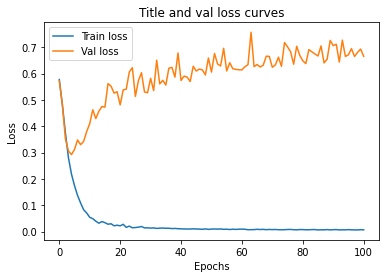

In [ ]:
import matplotlib.pyplot as plt

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label = "Train loss")
plt.plot(epoch_count, val_losses, label = "Val loss")
plt.title("Title and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

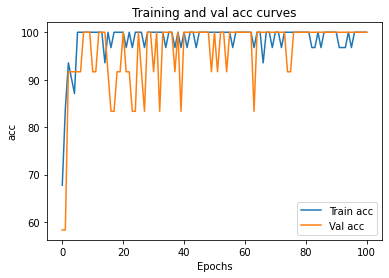

In [ ]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label = "Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend()